## TASK 1

## DATA SCIENCE & BUSINESS ANALYTICS
### Prediction using Supervised ML (Level - Beginner)
### Predict the percentage of an student based on the no. of study hours.

### Problem Statement --->  What will be predicted score if a student studies for 9.25 hrs/ day?

### IMPORT LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### READ DATA

In [4]:
df = pd.read_csv('C:/Users/ANNA/Desktop/SPARK_FOUNDATION/student_scores.csv')

### EXPLORATORY DATA ANALYSIS

In [5]:
df.head(2)
# This is a simple linear regression task as it involves just 2 variables.

,Hours,Scores
0,2.5,21
1,5.1,47


In [6]:
df.shape

(25, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:>

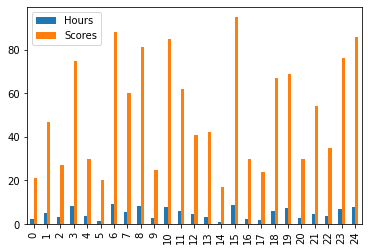

In [9]:
df.plot(kind='bar')

Text(0, 0.5, 'SCORES')

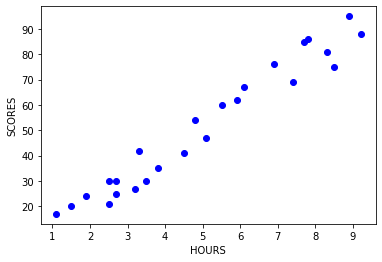

In [11]:
plt.scatter(df['Hours'],df['Scores'],color='blue')
plt.xlabel('HOURS')
plt.ylabel('SCORES')

### TRAIN TEST SPLIT

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
X = df['Hours']
y = df['Scores']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
X_train.shape,y_train.shape

((17,), (17,))

In [16]:
X_train = np.array(X_train).reshape((-1,1))
y_train = np.array(y_train).reshape((-1,1))
X_test  = np.array(X_test).reshape((-1,1))
y_test  = np.array(y_test).reshape((-1,1))

In [17]:
X_test.shape , y_test.shape

((8, 1), (8, 1))

### MODEL TRAINING

In [18]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# COEFFICIENT AND INTERCEPT FOR LINEAR REGRESSION LINE
print('Coefficient : m=',lm.coef_)
print('Intercept c=:',lm.intercept_)

Coefficient : m= [[9.96651548]]
Intercept c=: [2.10249307]


In [23]:
# Prediction using Test Data
yhat = lm.predict(X_test)

In [25]:
yhat

array([[27.01878177],
       [78.84466226],
       [39.97525189],
       [75.85470762],
       [56.91832821],
       [49.94176737],
       [33.99534261],
       [86.81787465]])

### What will be predicted score if a student studies for 9.25 hrs/ day

In [29]:
# y = mx + c
y = (lm.coef_ * X_train) + lm.intercept_
y[0:5]

array([[52.93172202],
       [13.0656601 ],
       [62.8982375 ],
       [27.01878177],
       [46.95181273]])

Text(0, 0.5, 'SCORES')

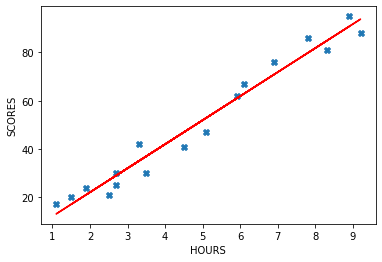

In [32]:
plt.scatter(X_train,y_train,marker='X')
plt.plot(X_train,y,color='red')
plt.xlabel('HOURS')
plt.ylabel('SCORES')

In [33]:
pred = (lm.coef_ * 9.25) + lm.intercept_
print('If a student studies for 9.25 hrs/ day ,predicted percentage is :',pred)

If a student studies for 9.25 hrs/ day ,predicted percentage is : [[94.29276126]]


### MODEL EVALUATION

In [34]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_squared_log_error
print('r2_score : ',r2_score(y_test,yhat) * 100 ,'%')
print('mean_squared_error :',mean_squared_error(y_test,yhat))
print('mean_absolute_error :',mean_absolute_error(y_test,yhat))
print('mean_squared_log_error :',mean_squared_log_error(y_test,yhat))

r2_score :  89.99124290533055 %
mean_squared_error : 41.634865645528876
mean_absolute_error : 5.864954643694258
mean_squared_log_error : 0.015051156316389638



'''
r2_Score
Higher r2_score means better model

MAE
Lower MAE means Better model
MAE is the average value of error in a set of predicted values, without considering direction.It ranges from 0 to inf.



RMSE
Lower RMSE means Better model and it is always greater in magnitude than MAE
RMSE is the square root of average value of squared error in a set of predicted ##values,without considering direction.
It ranges from 0 to inf.

'''

### USING STANDARD SCALER 

### https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train)
y_train_new = scaler.fit_transform(y_train)
X_test_new = scaler.fit_transform(X_test)
y_test_new = scaler.fit_transform(y_test)

In [43]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(X_train_new,y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
yhat1 = lm1.predict(X_test_new)

In [45]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_squared_log_error,accuracy_score
print('r2_score_new : ',r2_score(y_test_new,yhat1) * 100 ,'%')
print('mean_squared_error_new :',mean_squared_error(y_test_new,yhat1))
print('mean_absolute_error_new :',mean_absolute_error(y_test_new,yhat1))


r2_score_new :  91.15227767161723 %
mean_squared_error_new : 0.0884772232838277
mean_absolute_error_new : 0.28179345257555877


### K_FOLD CROSS VALIDATION
### https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k*l-fold_cross-validation

### https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [47]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 3, shuffle = False, random_state = 100)

In [48]:
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores 

array([0.91839373, 0.94915372, 0.96355424])

In [49]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.94 accuracy with a standard deviation of 0.02


In [51]:
KFold()

C:\Users\ANNA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


KFold(n_splits=3, random_state=None, shuffle=False)

In [68]:
X = df['Hours']
y = df['Scores']

kf = KFold(n_splits=3)
kf.get_n_splits(X)
print(kf)


for train_index, test_index in kf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X[train_index], X[test_index]
    y_train_cv, y_test_cv = y[train_index], y[test_index]

KFold(n_splits=3, random_state=None, shuffle=False)
TRAIN: [ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] TEST: [0 1 2 3 4 5 6 7 8]
TRAIN: [ 0  1  2  3  4  5  6  7  8 17 18 19 20 21 22 23 24] TEST: [ 9 10 11 12 13 14 15 16]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] TEST: [17 18 19 20 21 22 23 24]


In [69]:
X_train_cv = np.array(X_train_cv).reshape(-1,1)
X_test_cv = np.array(X_test_cv).reshape(-1,1)
y_train_cv = np.array(y_train_cv).reshape(-1,1)
y_test_cv = np.array(y_test_cv).reshape(-1,1)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lm_cv = LinearRegression()
lm_cv.fit(X_train_cv,y_train_cv)
print('Coefficient : m1=',lm_cv.coef_)
print('Intercept c1=:',lm_cv.intercept_)

Coefficient : m1= [[9.62976054]]
Intercept c1=: [2.23900533]


In [72]:
yhat_cv = lm_cv.predict(X_test_cv)

In [74]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_squared_log_error,accuracy_score
print('r2_score_new : ',r2_score(y_test_cv,yhat_cv) * 100 ,'%')
print('mean_squared_error_new :',mean_squared_error(y_test_cv,yhat_cv))
print('mean_absolute_error_new :',mean_absolute_error(y_test_cv,yhat_cv))

r2_score_new :  93.42276909497312 %
mean_squared_error_new : 30.657089863727688
mean_absolute_error_new : 5.134816050181712


In [75]:
X = df['Hours']
y = df['Scores']

In [79]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=3, n_repeats=3, random_state=2652124)

for train_index, test_index in rkf.split(X,y):
    
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_rkf, X_test_rkf = X[train_index], X[test_index]
    y_train_rkf, y_test_rkf = y[train_index], y[test_index]

TRAIN: [ 0  1  3  5  7  8 11 12 13 14 15 16 19 20 21 24] TEST: [ 2  4  6  9 10 17 18 22 23]
TRAIN: [ 2  3  4  5  6  7  8  9 10 13 14 17 18 20 21 22 23] TEST: [ 0  1 11 12 15 16 19 24]
TRAIN: [ 0  1  2  4  6  9 10 11 12 15 16 17 18 19 22 23 24] TEST: [ 3  5  7  8 13 14 20 21]
TRAIN: [ 0  1  2  4  5  6 12 13 16 17 18 19 20 22 23 24] TEST: [ 3  7  8  9 10 11 14 15 21]
TRAIN: [ 3  4  6  7  8  9 10 11 13 14 15 17 19 20 21 22 23] TEST: [ 0  1  2  5 12 16 18 24]
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 12 14 15 16 18 21 24] TEST: [ 4  6 13 17 19 20 22 23]
TRAIN: [ 0  1  2  3  5  8 10 11 12 13 16 17 18 20 22 24] TEST: [ 4  6  7  9 14 15 19 21 23]
TRAIN: [ 1  2  3  4  6  7  9 11 12 14 15 17 19 21 22 23 24] TEST: [ 0  5  8 10 13 16 18 20]
TRAIN: [ 0  4  5  6  7  8  9 10 13 14 15 16 18 19 20 21 23] TEST: [ 1  2  3 11 12 17 22 24]


In [80]:
X_train_rkf = np.array(X_train_rkf ).reshape(-1,1)
X_test_rkf = np.array(X_test_rkf).reshape(-1,1)
y_train_rkf = np.array(y_train_rkf).reshape(-1,1)
y_test_rkf = np.array(y_test_rkf).reshape(-1,1)

In [81]:
from sklearn.linear_model import LinearRegression
lm_rkf = LinearRegression()

lm_rkf.fit(X_train_rkf,y_train_rkf)
print('Coefficient : m1=',lm_rkf.coef_)
print('Intercept c1=:',lm_rkf.intercept_)

Coefficient : m1= [[9.81573022]]
Intercept c1=: [3.50524841]


In [82]:
yhat_rkf = lm_cv.predict(X_test_rkf)

In [83]:
Actual_data =list(y_test_rkf)
predicted_data =list(yhat_rkf)
compare = pd.DataFrame({'Actual':Actual_data,'prediction':predicted_data})
compare

,Actual,prediction
0,[47],[51.35078408921192]
1,[27],[33.05423906008862]
2,[75],[84.09196993080099]
3,[62],[59.054592522527]
4,[41],[45.57292776422562]
5,[24],[20.53555035595162]
6,[35],[38.83209538507492]
7,[86],[77.3511375516503]


In [86]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_squared_log_error,accuracy_score
print('r2_score_new : ',r2_score(y_test_rkf,yhat_rkf) * 100 ,'%')
print('mean_squared_error_new :',mean_squared_error(y_test_rkf,yhat_rkf))
print('mean_absolute_error_new :',mean_absolute_error(y_test_rkf,yhat_rkf))

r2_score_new :  92.48510811391736 %
mean_squared_error_new : 33.665541447793004
mean_absolute_error_new : 5.370091974909143


In [87]:
pred_rkf = (lm_rkf.coef_ * 9.25) + lm_rkf.intercept_
print('If a student studies for 9.25 hrs/ day ,predicted percentage is :',pred_rkf)

If a student studies for 9.25 hrs/ day ,predicted percentage is : [[94.30075299]]
